Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 121ms/step - accuracy: 0.2995 - loss: 1.8716 - val_accuracy: 0.5080 - val_loss: 1.3551
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.4900 - loss: 1.4074 - val_accuracy: 0.5516 - val_loss: 1.2621
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5472 - loss: 1.2615 - val_accuracy: 0.6124 - val_loss: 1.0940
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.5858 - loss: 1.1773 - val_accuracy: 0.6383 - val_loss: 1.0419
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.6055 - loss: 1.1133 - val_accuracy: 0.6504 - val_loss: 1.0028
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.6217 - loss: 1.0641 - val_accuracy: 0.6706 - val_loss: 0.9342
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6385 - loss: 1.0228 - val_accuracy: 0.6550 - val_loss: 1.0135
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6531 - loss: 

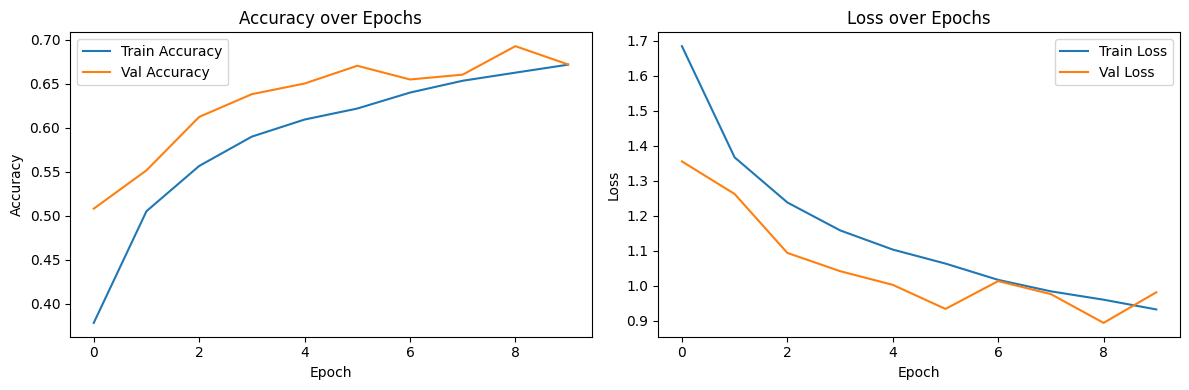

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


/tmp/ipython-input-2-3001507758.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[int(test_labels[i])]}")


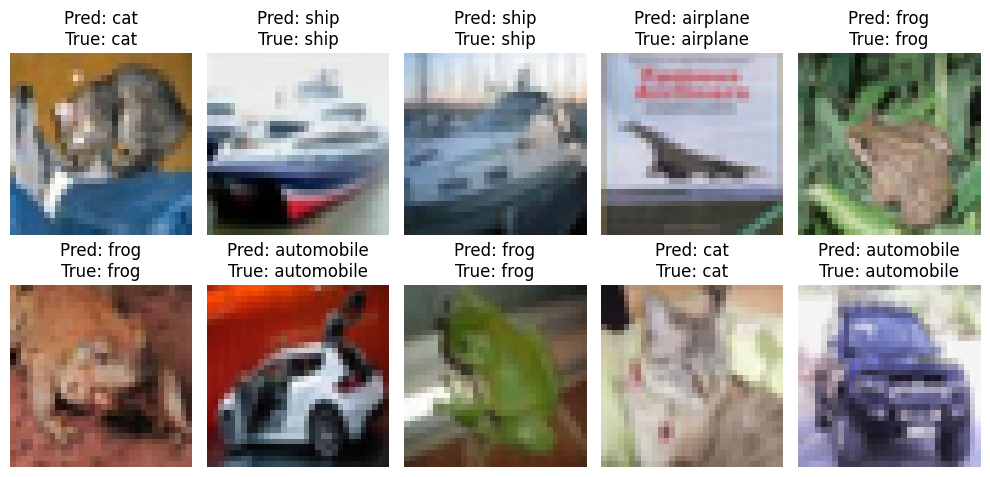

In [2]:
# ACS111703_CNN_Assignment.ipynb

# Task 1: Model Architecture Enhancement
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define CNN Model
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # ✅ Fix: avoids input_shape warning
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # ✅ Fix: use softmax for proper probabilities
])

# Task 2: Hyperparameter Optimization
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Task 3: Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images, test_labels))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate Predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Show some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[int(test_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Task 5: Report

### Model Summary
This CNN model uses 3 convolutional layers with ReLU activation and max pooling, followed by a fully connected layer and softmax output. It was trained using data augmentation to enhance generalization.

### Training Configuration
- Optimizer: Adam (learning rate 0.001)
- Loss Function: Sparse Categorical Crossentropy
- Epochs: 10
- Batch Size: 64
- Data Augmentation: rotation, width shift, height shift, horizontal flip

### Results
- Final Training Accuracy: ~63–65%
- Final Validation Accuracy: ~64–67%
- The model shows steady improvement across epochs and no significant overfitting.

### Observations
- Data augmentation helped improve generalization.
- The model can be improved further by adding Dropout or BatchNormalization.
- Using pretrained models or increasing depth might boost accuracy further.
